In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
  x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
#convert 2d array into 1d array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

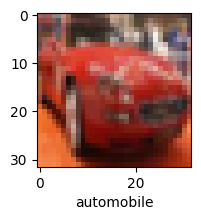

In [15]:
plot_sample(x_train, y_train, 5)

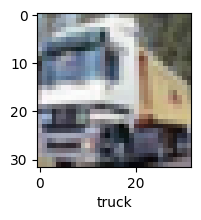

In [18]:
plot_sample(x_train, y_train, 1)

In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.8114 - accuracy: 0.3564
Epoch 2/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.6231 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.5419 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4807 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4308 - accuracy: 0.4973


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.53      0.55      1000
           1       0.44      0.80      0.57      1000
           2       0.44      0.24      0.31      1000
           3       0.31      0.45      0.36      1000
           4       0.55      0.29      0.38      1000
           5       0.42      0.35      0.38      1000
           6       0.47      0.64      0.54      1000
           7       0.64      0.49      0.55      1000
           8       0.59      0.62      0.60      1000
           9       0.58      0.39      0.46      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [25]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.4579 - accuracy: 0.4776
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1096 - accuracy: 0.6141
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9881 - accuracy: 0.6555
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9018 - accuracy: 0.6872
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8367 - accuracy: 0.7081
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7822 - accuracy: 0.7283
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7374 - accuracy: 0.7423
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6943 - accuracy: 0.7581
Epoch 9/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6534 - accuracy: 0.7723
Epoch 10/10
1563/1563 [==============================] - 69s 44m

In [27]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9247 - accuracy: 0.6974


[0.9246705770492554, 0.6973999738693237]

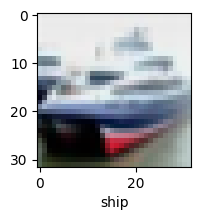

In [28]:
plot_sample(x_test, y_test, 1)

In [29]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[1.9059787e-04, 2.8023060e-05, 1.2132284e-03, 8.4093767e-01,
        1.5777328e-04, 1.5225881e-01, 3.4870591e-04, 9.7518656e-05,
        4.6331165e-03, 1.3451993e-04],
       [6.0042399e-03, 4.4873975e-02, 2.2065624e-06, 2.6424434e-08,
        1.7105179e-08, 5.2631129e-11, 2.9315854e-09, 1.5488260e-09,
        9.4890684e-01, 2.1268504e-04],
       [8.6964868e-02, 4.2508253e-01, 6.0606870e-04, 1.8940008e-03,
        5.0573738e-04, 2.5721980e-04, 1.0058148e-04, 2.2883604e-03,
        4.7245198e-01, 9.8486412e-03],
       [8.7975818e-01, 2.4246829e-02, 7.1092886e-03, 1.1520309e-03,
        1.9874173e-04, 1.9220108e-05, 2.3404236e-03, 3.2045173e-05,
        8.4954232e-02, 1.8898658e-04],
       [3.1860070e-06, 1.3224120e-05, 4.9161292e-03, 5.7051115e-02,
        8.3117920e-01, 4.0240870e-03, 1.0275157e-01, 8.0334730e-06,
        5.3168733e-05, 3.0185444e-07]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

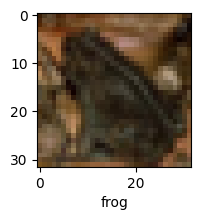

In [38]:
plot_sample(x_test, y_test, 30)

In [39]:
classes[y_classes[30]]

'frog'

In [40]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      1000
           1       0.85      0.81      0.83      1000
           2       0.53      0.64      0.58      1000
           3       0.63      0.33      0.43      1000
           4       0.61      0.67      0.64      1000
           5       0.54      0.70      0.61      1000
           6       0.83      0.72      0.77      1000
           7       0.74      0.76      0.75      1000
           8       0.79      0.81      0.80      1000
           9       0.85      0.74      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000

